# Naive Bayes Implementation x55 Machine Learning

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import re
import csv
import os
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn import metrics


In [2]:
# created an empty feature list
categories = []

# open file 
feature_file = open('spambase.names')
# remove '\n', split the text,  and match with word_freq|char_freq feature 
for line in feature_file:
    if not re.match(r'\|', line):
        line = line.rstrip()
        if re.search(r'(word_freq_|char_freq_|capital_run_length_).+', line):   
            words = line.split()
            categories.append(words[0])
# append spam feature           
categories.append('spam')



In [3]:
# get the file
data_file = open('spambase.data')
# remove extra space, split the lines and store in csv file
for file in data_file:
    space_remove = (line.strip() for line in data_file)
    lines = (line.split(",") for line in space_remove if line)
    with open('spambase.csv', 'w') as out_file:
        writer = csv.writer(out_file)
        writer.writerow(categories)
        writer.writerows(lines)

**Q1. Simple counts of spam and ham messages.**

In [4]:
data = pd.read_csv('spambase.csv', sep = ',')
# Count spam and non-spam
count_ham = len(data[data.spam == 0])
count_spam = len(data[data.spam == 1])

print("ham: %d" %count_ham)
print("Spam: %d" %count_spam)

ham: 2788
Spam: 1812


In [5]:
print(data.head())

   word_freq_make:  word_freq_address:  word_freq_all:  word_freq_3d:  \
0             0.21                0.28            0.50            0.0   
1             0.06                0.00            0.71            0.0   
2             0.00                0.00            0.00            0.0   
3             0.00                0.00            0.00            0.0   
4             0.00                0.00            0.00            0.0   

   word_freq_our:  word_freq_over:  word_freq_remove:  word_freq_internet:  \
0            0.14             0.28               0.21                 0.07   
1            1.23             0.19               0.19                 0.12   
2            0.63             0.00               0.31                 0.63   
3            0.63             0.00               0.31                 0.63   
4            1.85             0.00               0.00                 1.85   

   word_freq_order:  word_freq_mail:  ...  char_freq_;:  char_freq_(:  \
0              0.00

**Split the training and testing** 
The train-test split procedure is appropriate when you have a very large dataset, a costly model to train, or require a good estimate of model performance quickly.A training set with the size of 0.25 (25 percent) means that the remainder percentage 0.75 (75 percent) is assigned to the test set.

In [6]:
X = data.values[:, 0:57]
Y = data.values[:, 57]

#takes a loaded dataset as input and returns the dataset split into two subsets.
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)

In [11]:
# Create an sklearn logistic regression model, solver is an iterative method 
# that solves 
logmodel = LogisticRegression(solver='lbfgs', max_iter=3_000)
# Create an sklearn gaussian naive bayes classifier model
gnb = GaussianNB()

# Fit both models to the training set
logmodel = logmodel.fit(x_train, y_train)
gnb = gnb.fit(x_train, y_train)

b. naïve bayes libraries and compare the results using 10 fold cross validation.

In [8]:
log_score = cross_val_score(logmodel, X=x_train, y=y_train, cv=10, n_jobs=10)
gnb_score = cross_val_score(gnb, X=x_train, y=y_train, cv=10, n_jobs=1)

print("10 Fold Cross Validation Accuracy - Logistic Regression: %.3f" %log_score.mean())
print("10 Fold Cross Validation Accuracy - Naive Bayes: %.3f" %gnb_score.mean())
print("The Logistic Regression models seems to be classifying the data more accurately.")

10 Fold Cross Validation Accuracy - Logistic Regression: 0.931
10 Fold Cross Validation Accuracy - Naive Bayes: 0.827
The Logistic Regression models seems to be classifying the data more accurately.


In [9]:
# what is the accuracy of both
# Have both models estimate the test set
log_y_pred = logmodel.predict(x_test)
gnb_y_pred = gnb.predict(x_test)
# Calculate the accuracy of both models
log_accuracy = metrics.accuracy_score(y_test, log_y_pred)
gnb_accuracy = metrics.accuracy_score(y_test, gnb_y_pred)
print("SK Logistic Regression Accuracy %.3f" %log_accuracy)
print("SK Naive Bayes Accuracy %.3f" %gnb_accuracy)


SK Logistic Regression Accuracy 0.916
SK Naive Bayes Accuracy 0.814


**plot the two AUCs and compare.**

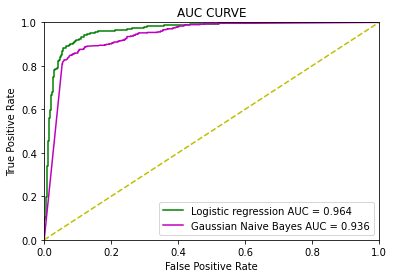

In [10]:
# calculate the fpr and tpr for all thresholds of the classification
probs = logmodel.predict_proba(x_test)
preds = probs[:,1]
fpr_log, tpr_log, threshold_log = metrics.roc_curve(y_test, preds)
roc_auc_log = metrics.auc(fpr_log, tpr_log)

probs = gnb.predict_proba(x_test)
preds = probs[:,1]
fpr_gnb, tpr_gnb, threshold_gnb = metrics.roc_curve(y_test, preds)
roc_auc_gnb = metrics.auc(fpr_gnb, tpr_gnb)

# method I: plt
import matplotlib.pyplot as plt
plt.title('AUC CURVE')
plt.plot(fpr_log, tpr_log, 'g',linestyle='-', label = 'Logistic regression AUC = %0.3f' % roc_auc_log)
plt.plot(fpr_gnb, tpr_gnb, 'm', label = 'Gaussian Naive Bayes AUC = %0.3f' % roc_auc_gnb)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'y--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

***Quantitative Diagnostic:***
The Logistic regression AUC show better performance at ~ 96.4%
The Gaussian Naive Bayes AUC performed at ~93.6%